## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [3]:
data = pd.read_csv('adult.csv', na_values = '?', skipinitialspace = True)
df = data

## Inspect the Dataset

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

There are missing values in 3 colums: 
1. workclass
2. occupation
3. native-country

#### Descriptive Statistics

In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
categorical_columns = df.select_dtypes(include = ['object']).columns
numerical_columns = df.select_dtypes(include = ['int64','float64']).columns
categorical_columns[:-1]

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

## Data Visualization

### Dataset Quick Review

In [9]:
# Function to annotate bar charts

def annotate_bars(ax, fontsize=12):
    """
    Annotates each bar in a bar plot with its height (count).

    Parameters:
    - ax : matplotlib Axes object
        The Axes object containing the bar plot.
    - fontsize : int, optional (default=12)
        Font size for the annotations.

    Returns:
    None
    """
    # Iterate through each bar in the plot
    for p in ax.patches:
        height = round(p.get_height(),2)  # Get the height of the bar
        width = p.get_width()  # Get the width of the bar
        x, y = p.get_xy()  # Get the position of the bar
        
        # Annotate the count at the top of each bar
        ax.annotate(f'{height}', (x + width/2, height), ha='center', va='bottom', fontsize=fontsize)


#### Target Distribution

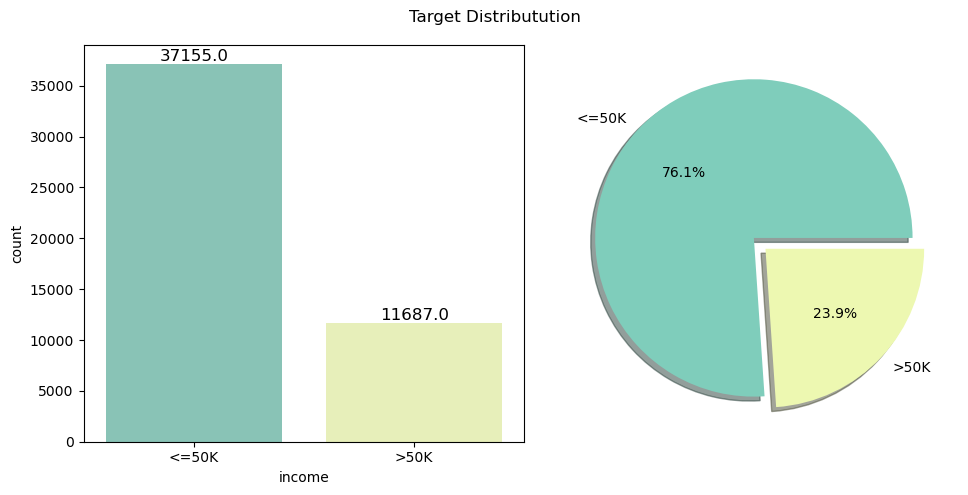

In [10]:
# % calculation
target_dist = df['income'].value_counts().reset_index()


# Custom color palette (HEX codes)
color_palette = ["#7fcdbb", "#edf8b1"]

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Target Distributution')
# Distribution count
sns.countplot(x = 'income', data = df, hue = 'income', palette=color_palette, ax = axs[0])
annotate_bars(axs[0])  # Annotate the values on each bar

# Pie chart
axs[1].pie(target_dist['count'], labels=target_dist['income'], colors=color_palette,
           autopct='%1.1f%%', explode=[0.05, 0.05], shadow = True)

plt.tight_layout()
plt.show()

Observation:
- There is a significant class imbalance in this dataset. 
- Specifically, 76.1% of people have an income less than 50K, while 23.9% have an income greater than 50K.

#### Demographic Information

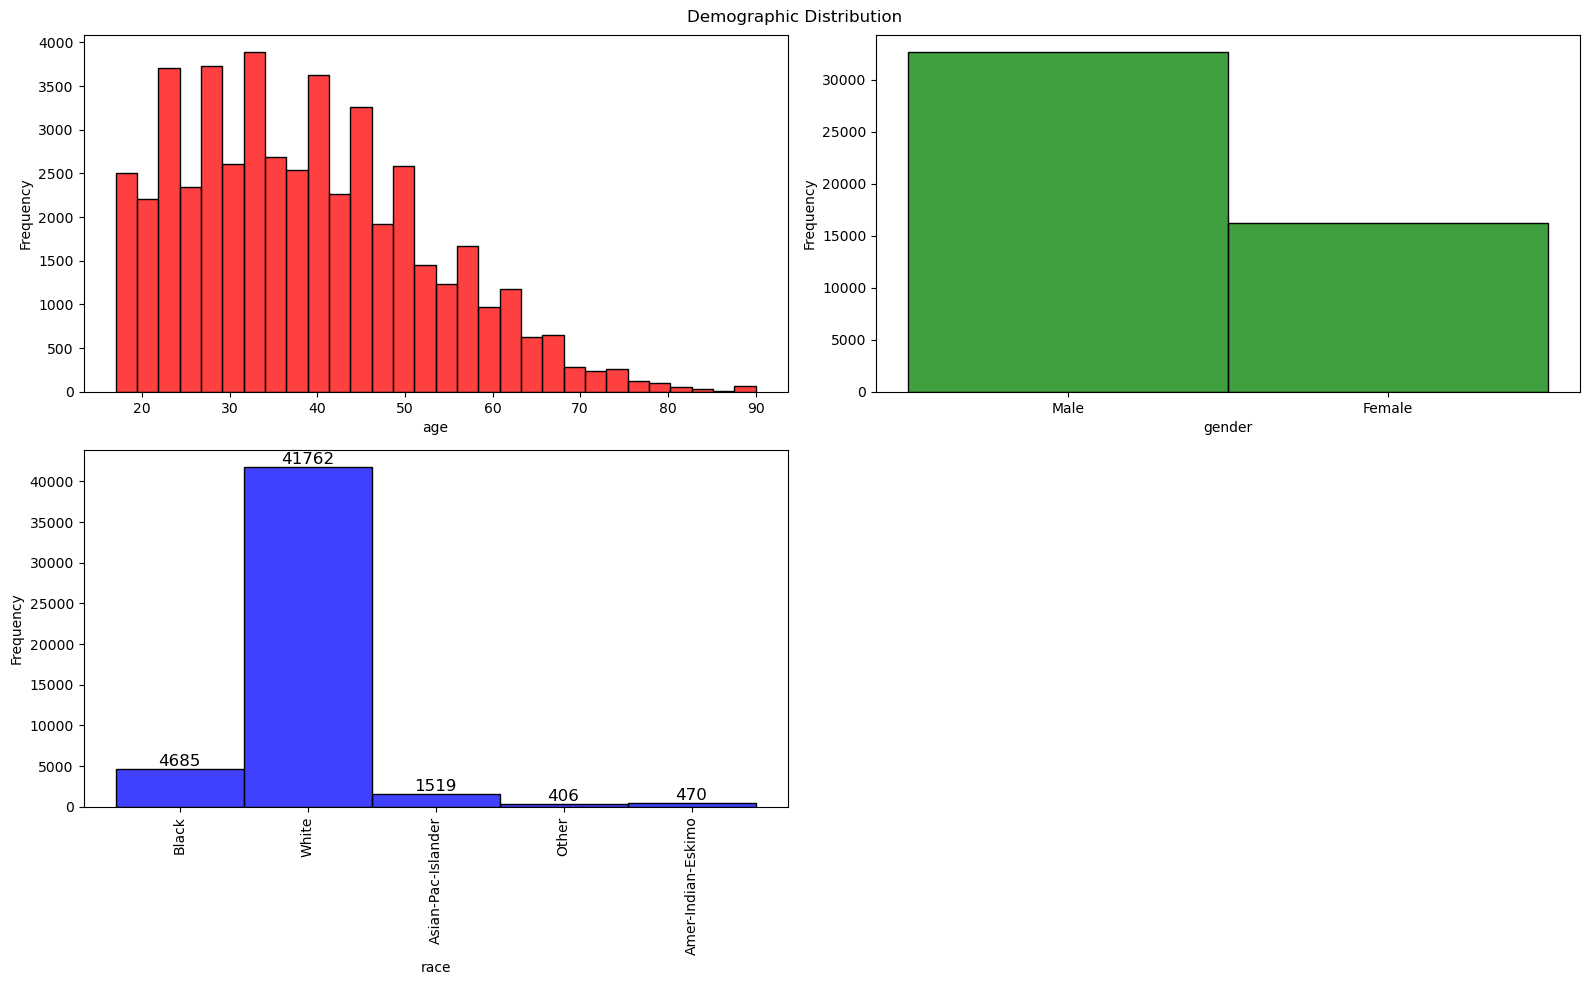

In [11]:
demographic_cols = ['age','gender', 'race']
colors = ['r', 'g', 'b']
plt.figure(figsize = (16,10))
plt.suptitle('Demographic Distribution')
for i,col in enumerate(demographic_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(x = col, data = df, bins = 30, color = colors[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    if (i == 2):
        ax = plt.gca()
        annotate_bars(ax)
        plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Observation:
- We can see the gender distribution is not uniform as well as the abundance of white race in the dataset.
- Most individuals' ages are within 13.71 (std) years above or below the mean (roughly between 25 and 52 years). This suggests moderate variability in age, capturing a broad span of adult ages.
- It’s clear that the dataset contains the highest number of examples for the `white` race, while the other races have fewer than 5,000 examples each.

#### Socioeconomic Background

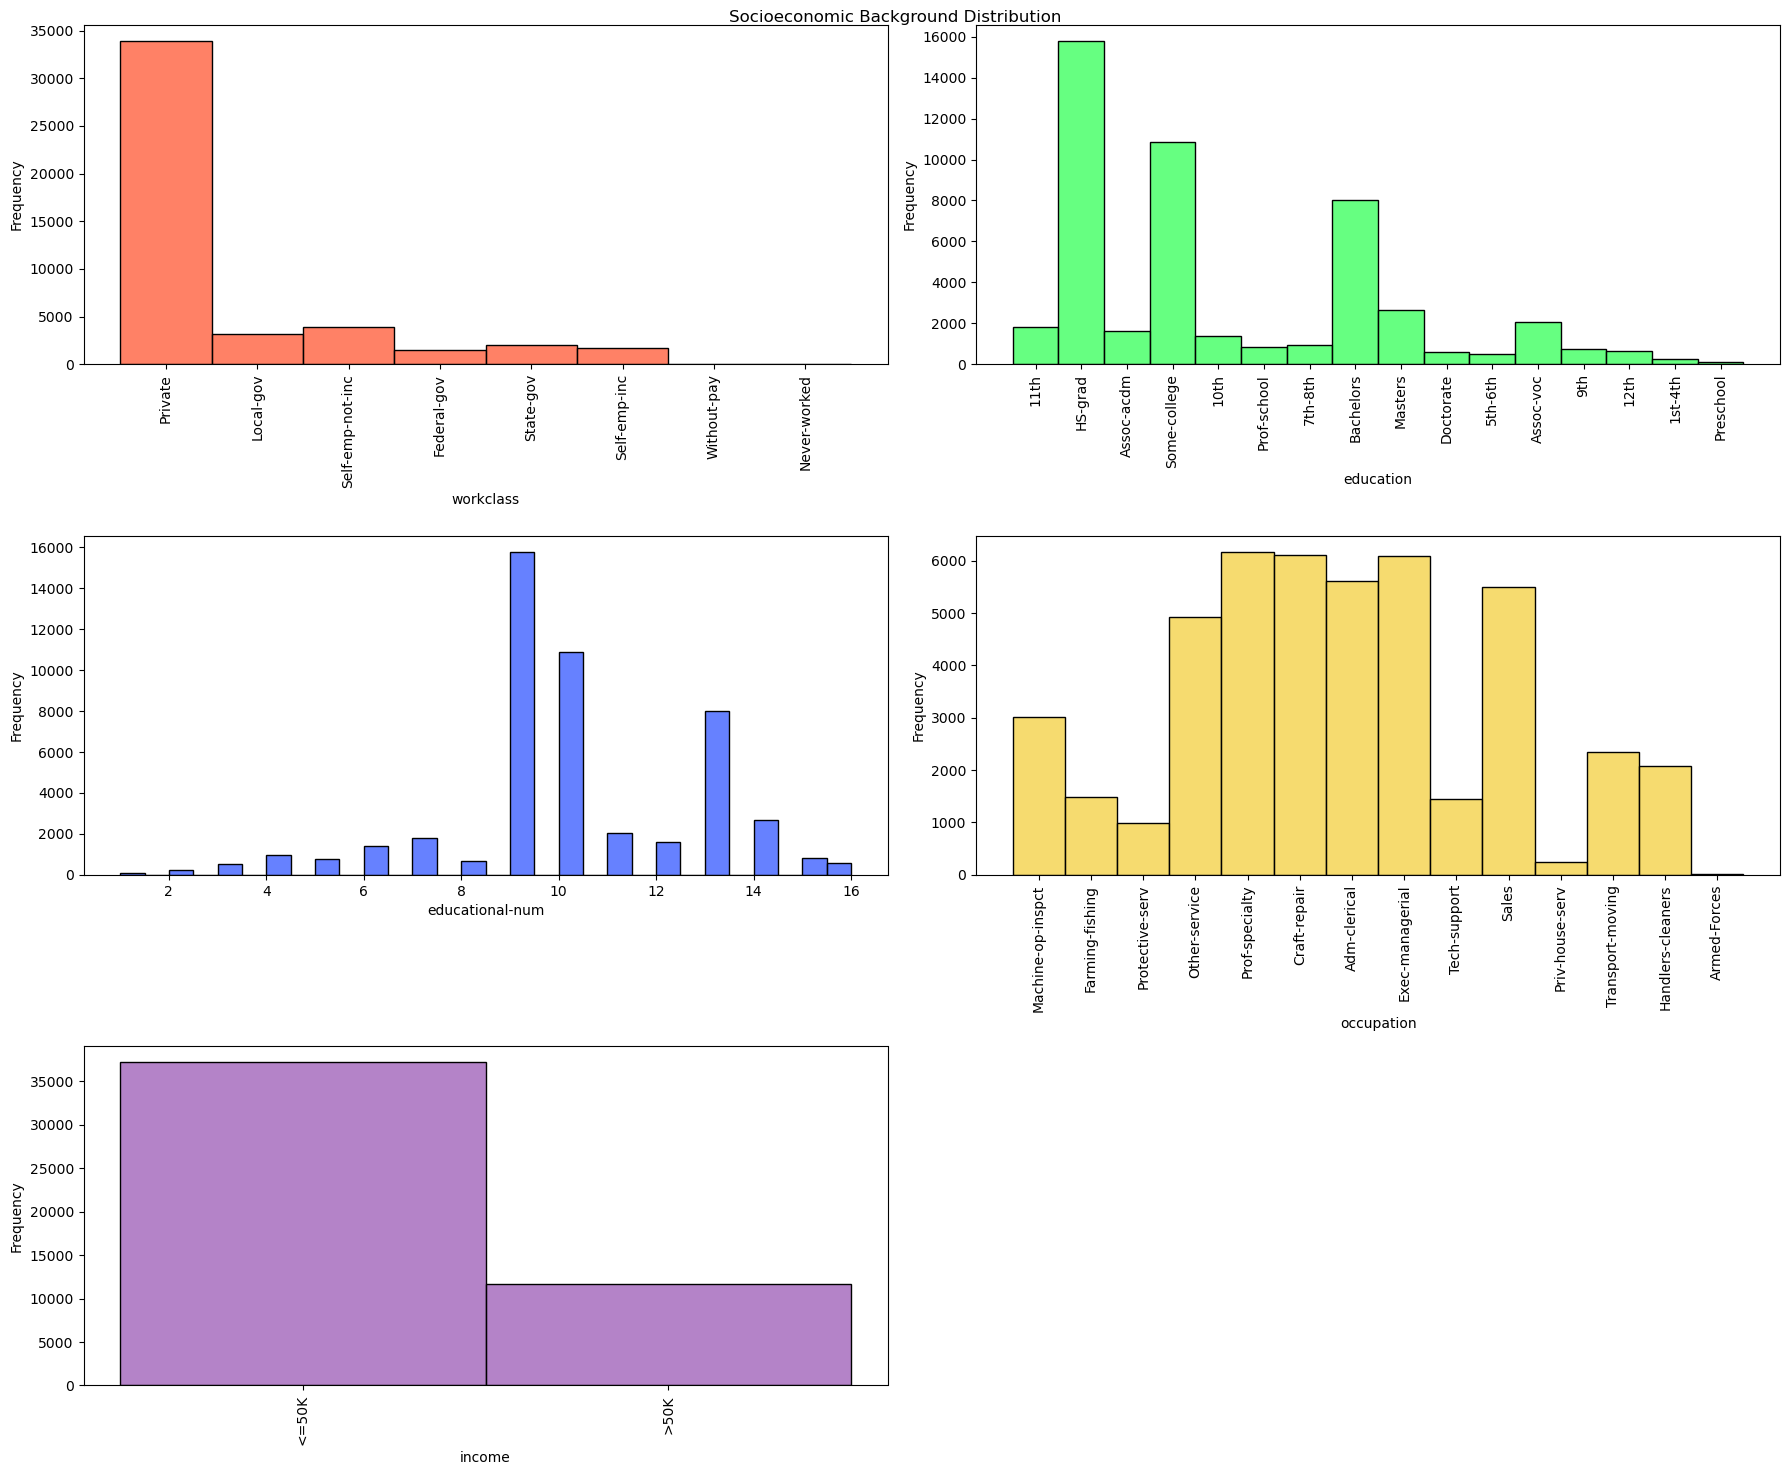

In [12]:
soc_back = ['workclass', 'education', 'educational-num','occupation','income']
colors = ['#FF5733', '#33FF57', '#3357FF', '#F4D03F', '#9B59B6', '#E74C3C']
plt.figure(figsize = (18,15))
plt.suptitle('Socioeconomic Background Distribution')
for i,col in enumerate(soc_back):
    plt.subplot(3,2,i+1)
    sns.histplot(x = col, data = df, bins = 30, color = colors[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    if df[col].dtype == 'object':
        plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Observation:
- Most individuals completed between 8 to 12 years of education (educational_num).
- We can see that most of workclass fall under the private.


#### Financial Indicators

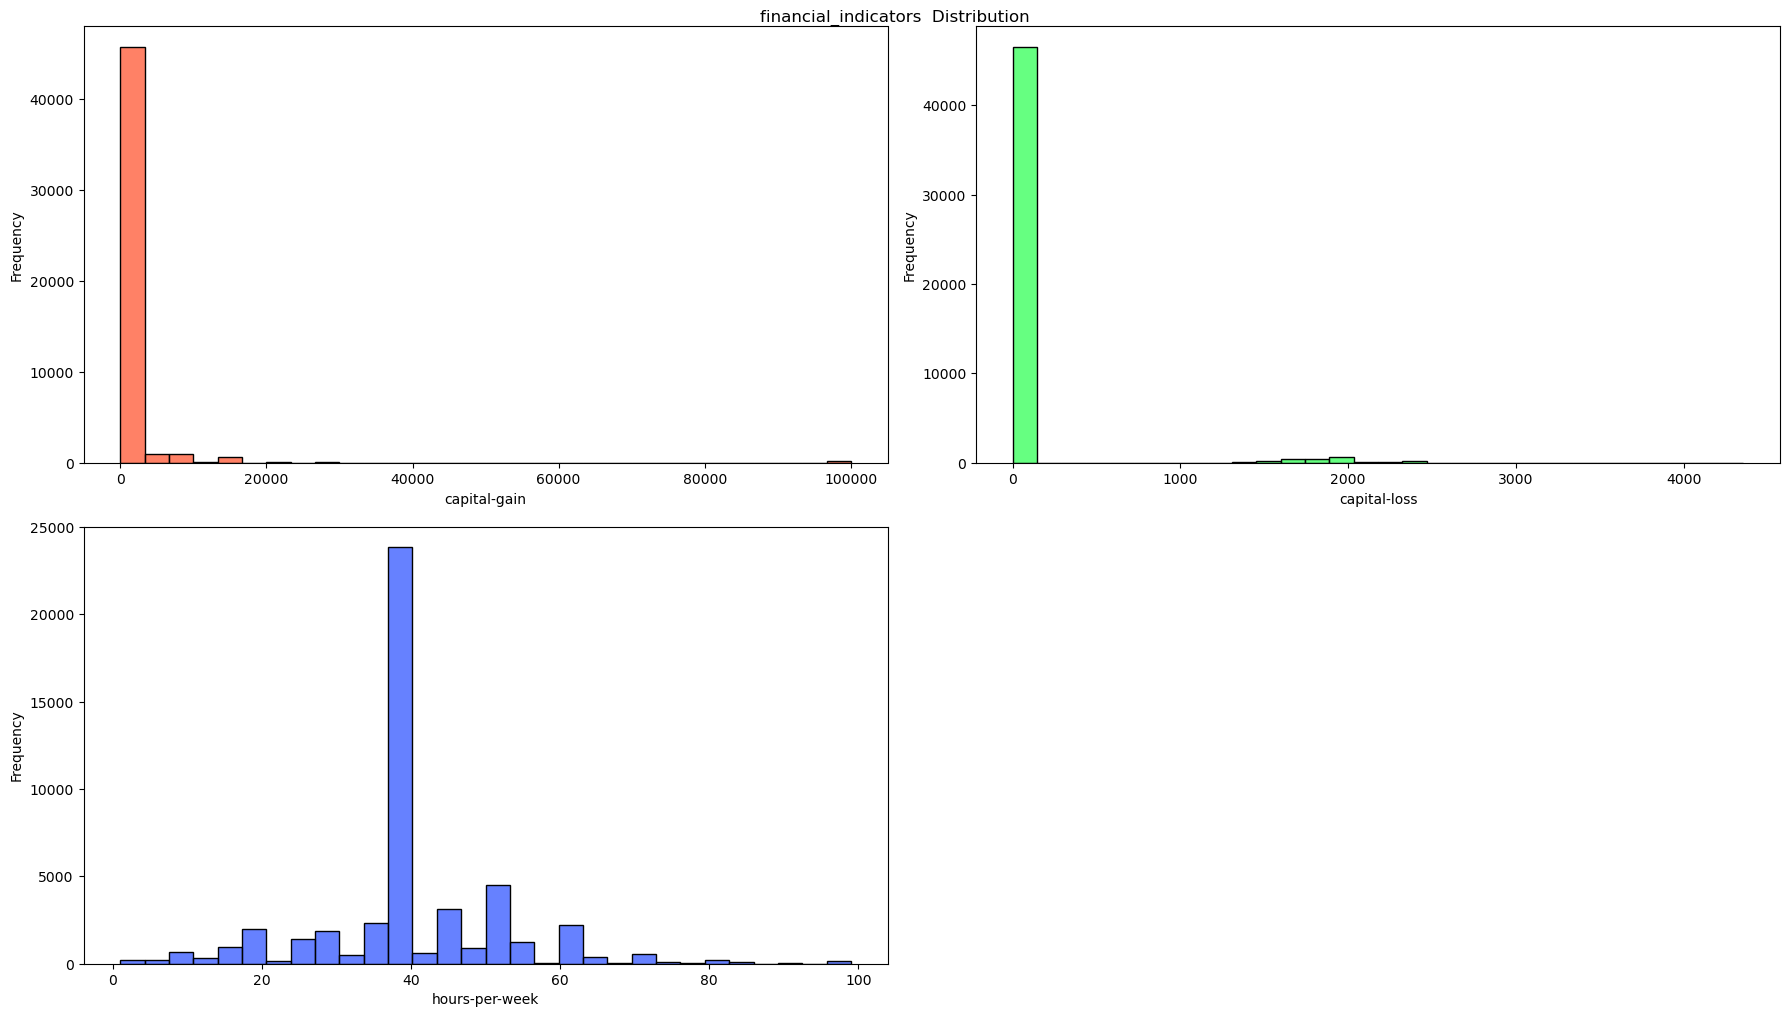

In [13]:
df.columns
financial_indicators = ['capital-gain', 'capital-loss', 'hours-per-week']
colors = ['#FF5733', '#33FF57', '#3357FF', '#F4D03F', '#9B59B6', '#E74C3C']
plt.figure(figsize = (18,15))
plt.suptitle('financial_indicators  Distribution')
for i,col in enumerate(financial_indicators):
    plt.subplot(3,2,i+1)
    sns.histplot(x = col, data = df, bins = 30, color = colors[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    if df[col].dtype == 'object':
        plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Observation:
- Most of the people working 40 hours a week, indicating that the dataset primarily includes full-time worker
- Most people have little to no capital gain, but a few have very high gains, leading to a skewed distribution.
- Most individuals report zero losses, but a small number have substantial losses

<hr>

### In deepth Analysis

In [14]:
order_edu = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
edu_data = df
edu_data['education'] = pd.Categorical(edu_data['education'], categories=order_edu, ordered=True)

#### Income by Education

In [15]:
grouped_counts_edu = edu_data.groupby(['education','income']).size().unstack()
total_edu_count = grouped_counts_edu.sum(axis = 1)

c = round((grouped_counts_edu.div(total_edu_count , axis = 0)*100),2)
print('Top 5 education earning >50K:\n',c['>50K'].nlargest(5))
print('--'*40)
print('Top 5 education earning <=50K:\n',c['<=50K'].nlargest(5))

Top 5 education earning >50K:
 education
Prof-school    73.98
Doctorate      72.56
Masters        54.91
Bachelors      41.28
Assoc-acdm     25.80
Name: >50K, dtype: float64
--------------------------------------------------------------------------------
Top 5 education earning <=50K:
 education
Preschool    98.80
1st-4th      96.76
11th         94.92
5th-6th      94.70
9th          94.58
Name: <=50K, dtype: float64


C:\Users\zhasa\AppData\Local\Temp\ipykernel_4488\903405312.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts_edu = edu_data.groupby(['education','income']).size().unstack()


Observation:
- Hihgly qualified people are tend to earn more

C:\Users\zhasa\AppData\Local\Temp\ipykernel_4488\365025268.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(order_edu, rotation = 90)


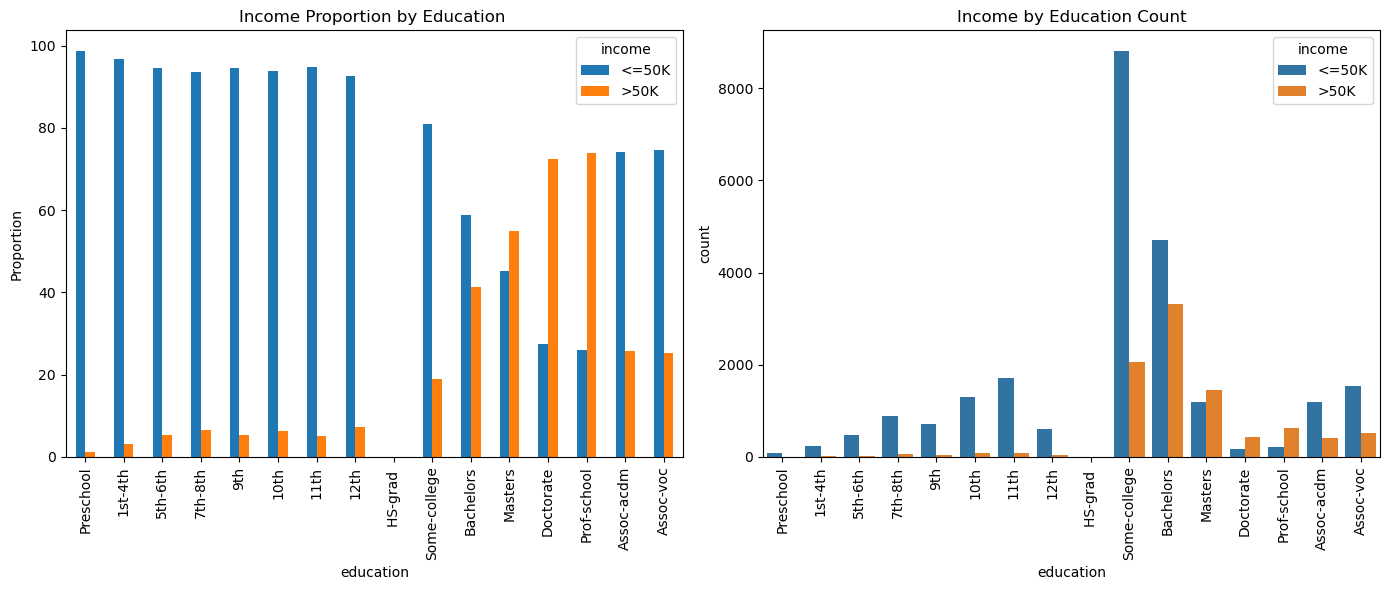

In [16]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
c.plot(kind = 'bar', ax = axs[0])
axs[0].set_title('Income Proportion by Education ')
axs[0].set_ylabel('Proportion')


sns.countplot(data = edu_data, x = 'education', hue = 'income', ax=axs[1])
axs[1].set_xticklabels(order_edu, rotation = 90)
axs[1].set_title('Income by Education Count')

plt.tight_layout()
plt.show()

observation:
- People with degrees in `Prof-school`, `Doctorate`, `Masters`, `Bachelors`, and `Assoc-acdm` tend to earn a lot.
- Interestingly, most people with `Prof-school`, `Doctorate`, and `Masters` degrees earn more than 50K.
- Among people with `Bachelors` degrees, nearly half earn more than 50K, while the other half earn 50K or less.

Income by Education Number

<Axes: xlabel='educational-num'>

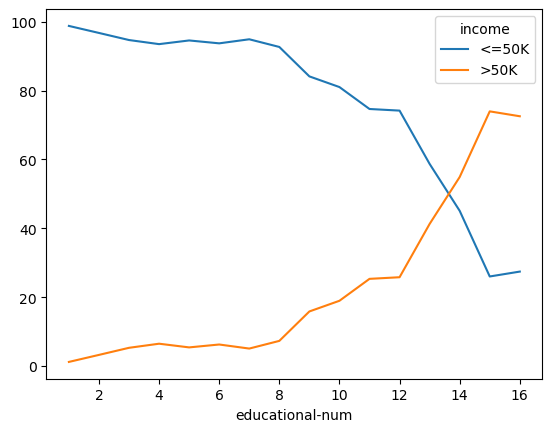

In [36]:
grouped_educational_num = df.groupby(['educational-num', 'income']).size().unstack()
grouped_educational_num_count = grouped_educational_num.sum(axis = 1)
proportion_educational_num = round((grouped_educational_num.div(grouped_educational_num_count , axis = 0)*100),2)
proportion_educational_num.plot(kind = 'line')

Observation:
- Only a small proportion of people with less than 12 years of education earn more than $50k a year. This proportion increases almost linearly after 12 years of education.
- The intersection of the two lines indicates that after 14 years of education, more than 50% of the people earn >$50k a year.


#### Income by Gender

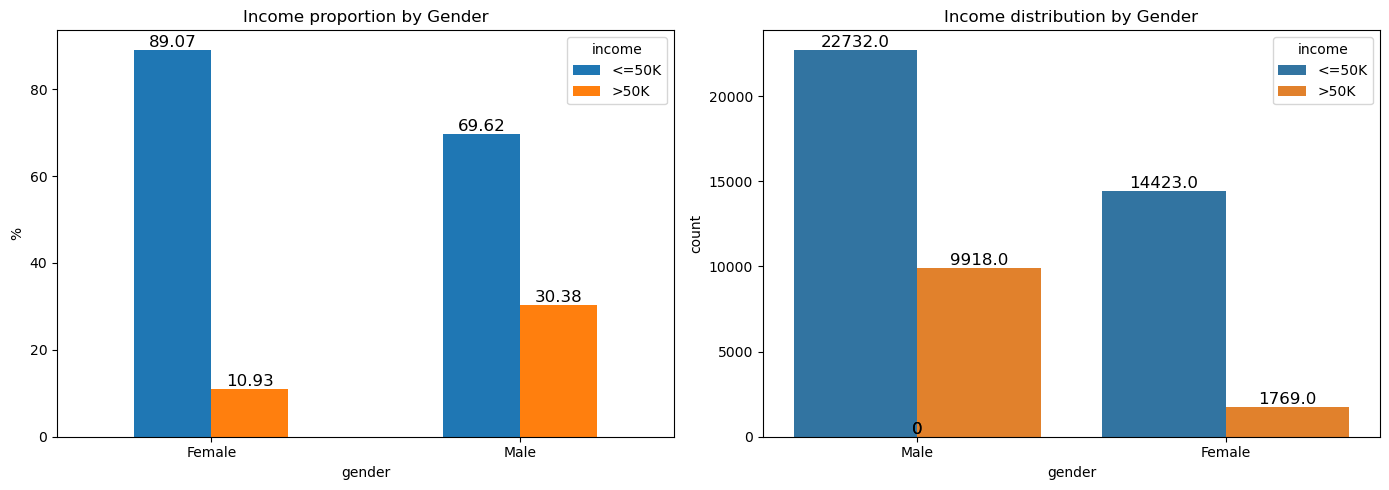

In [17]:
grouped_gender_counts = df.groupby(['gender','income']).size().unstack()
total_gender_counts= grouped_gender_counts.sum(axis = 1)

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Calculate the proportion of individuals for each income category within each gender
grouped_gender_proportion = round(grouped_gender_counts.div(total_gender_counts, axis=0)*100,2)
grouped_gender_proportion.plot(kind = 'bar', ax=axs[0])
axs[0].set_xticklabels(['Female','Male' ],rotation = 0)
annotate_bars(axs[0])

axs[0].set_ylabel('%')
axs[0].set_title('Income proportion by Gender')


sns.countplot(data = df, x = 'gender', hue = 'income', ax = axs[1])
axs[1].set_title('Income distribution by Gender')
annotate_bars(axs[1])
plt.tight_layout()
plt.show()
# Another Approach to deal with this
# proportion_counts = proportion_counts.reset_index()
# plt.bar(proportion_counts['gender'], proportion_counts['<=50K'], label = '<=50K')
# plt.bar(proportion_counts['gender'], proportion_counts['>50K'], label = '>50K')
# plt.legend()

Observation:
- Males earn more than females
- Among the female nearly 11% earns >50K
- On the other hand, among the males 30.38% earns more then 50K.

#### Gender and Education

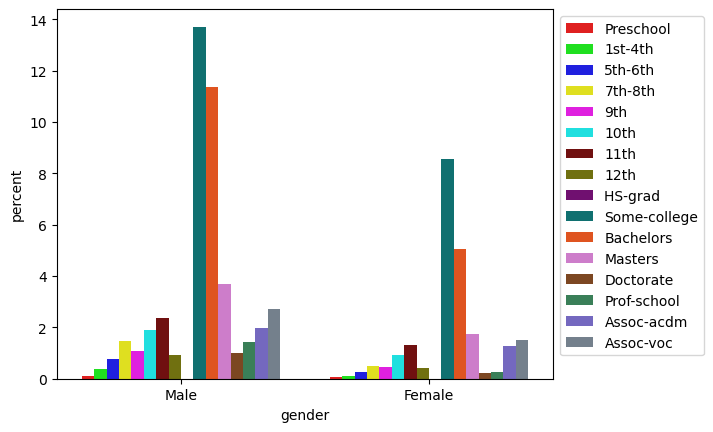

In [18]:
# Use a distinctive color palette
distinctive_palette = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#800000",  # Maroon
    "#808000",  # Olive
    "#800080",  # Purple
    "#008080",  # Teal
    "#FF4500",  # Orange Red
    "#DA70D6",  # Orchid
    "#8B4513",  # SaddleBrown
    "#2E8B57",  # SeaGreen
    "#6A5ACD",  # SlateBlue
    "#708090"   # SlateGray
]

sns.countplot(data = edu_data, x = 'gender', hue = 'education',  stat = 'percent', palette=distinctive_palette)
# Placing the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Observation:
- Males are generally more highly educated than females. The proportion of males with `Prof-school`, `Doctorate`, `Masters`, `Bachelors`, and `Assoc-acdm` degrees is much higher than that of females. This largely explains why males tend to earn more than females.

#### Gender and hpw

<Figure size 1000x600 with 0 Axes>

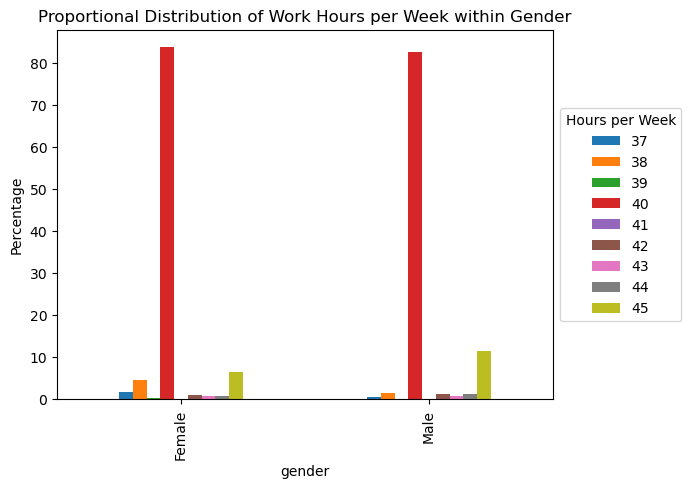

In [19]:
# Filter hours per week between 37 and 45
hpw_ranged = df[(df['hours-per-week'] >= 37) & (df['hours-per-week'] <= 45)]

# Group by gender and hours per week, unstack to create matrix-like data
grouped_HPWs = hpw_ranged.groupby(['gender', 'hours-per-week']).size().unstack()

# Calculate the total count for each gender group
totl_grouped_HPWs = grouped_HPWs.sum(axis=1)

# Calculate the percentage of hours per week within each gender group
grouped_hpw_proportion = round((grouped_HPWs.div(totl_grouped_HPWs, axis=0) * 100), 2)

# Plot the proportional distribution
plt.figure(figsize=(10, 6))
grouped_hpw_proportion.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Proportional Distribution of Work Hours per Week within Gender')
plt.ylabel('Percentage')

plt.legend(title='Hours per Week', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [20]:
grouped_hpw_proportion

hours-per-week,37,38,39,40,41,42,43,44,45
gender,,,,,,,,,
Female,1.74,4.64,0.36,83.75,0.19,1.01,0.90,0.82,6.59
Male,0.48,1.63,0.17,82.65,0.22,1.33,0.79,1.27,11.45


Observation:
- Both genders overwhelmingly work 40 hours per week, but males tend to work slightly longer hours, with a higher proportion working 45 hours.
- From the HPW data, we can infer that the tendency for more males to work longer hours (especially at 45 HPW) is likely a contributing factor to males earning more. While most work 40 hours, the additional work time for males, especially at 45 hours per week, suggests higher overall earnings through either overtime or simply more hours worked.

However, HPW is only one part of the earnings story. Other factors, such as differences in hourly wages, job roles, industries, and advancement opportunities, also play significant roles in determining income disparities

#### Age and Education

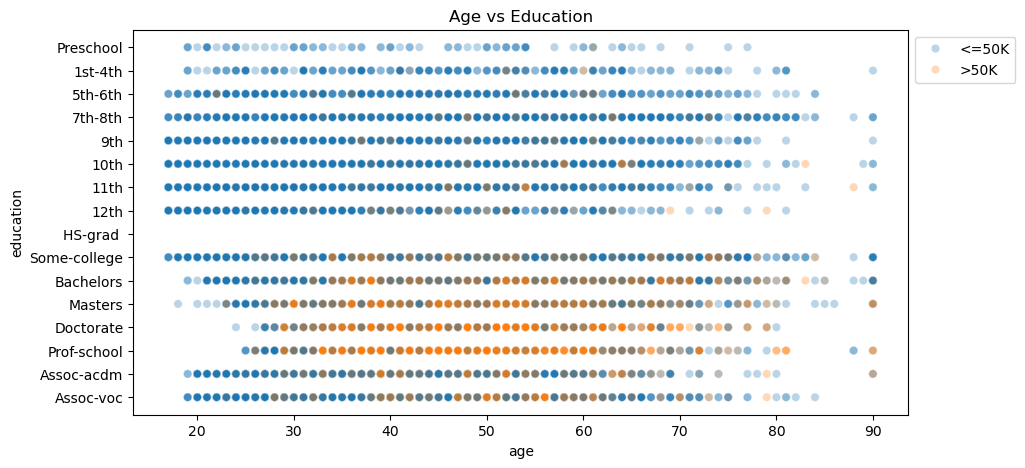

In [21]:
plt.figure(figsize = (10,5))
plt.title("Age vs Education")
sns.scatterplot(x = 'age', y = 'education', data = edu_data, hue = 'income', alpha = .3)
# Placing the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Observation: <br>
- In the bottom portion of the graph, higher-income individuals are densely populated. This suggests that middle-aged people with a good education (bachelor's or master's degrees or Doctorate) are earning well, which is quite natural.

#### Education and Workclass

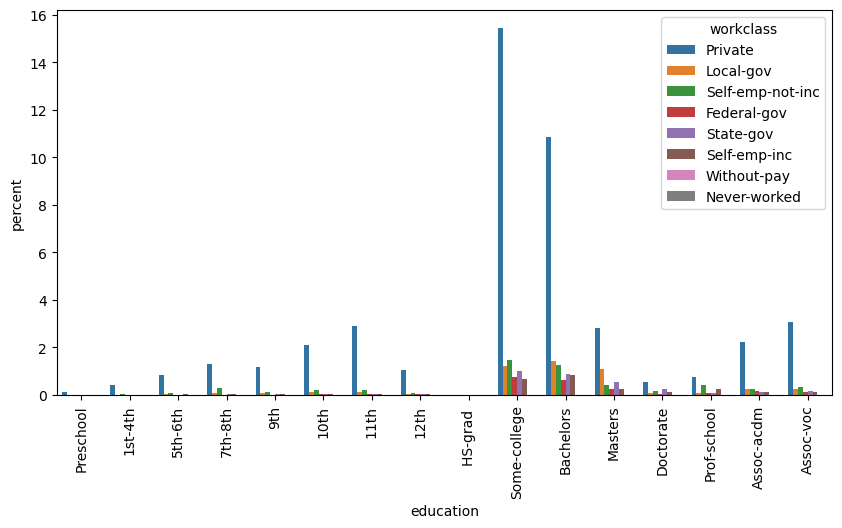

In [22]:
# Education vs Workclass
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'education', hue = 'workclass', stat = 'percent', order= order_edu)
plt.xticks(rotation = 90)
plt.show()

Observation: 
- It is evident from above that majority of the workclass from different education groups work in the private sector.

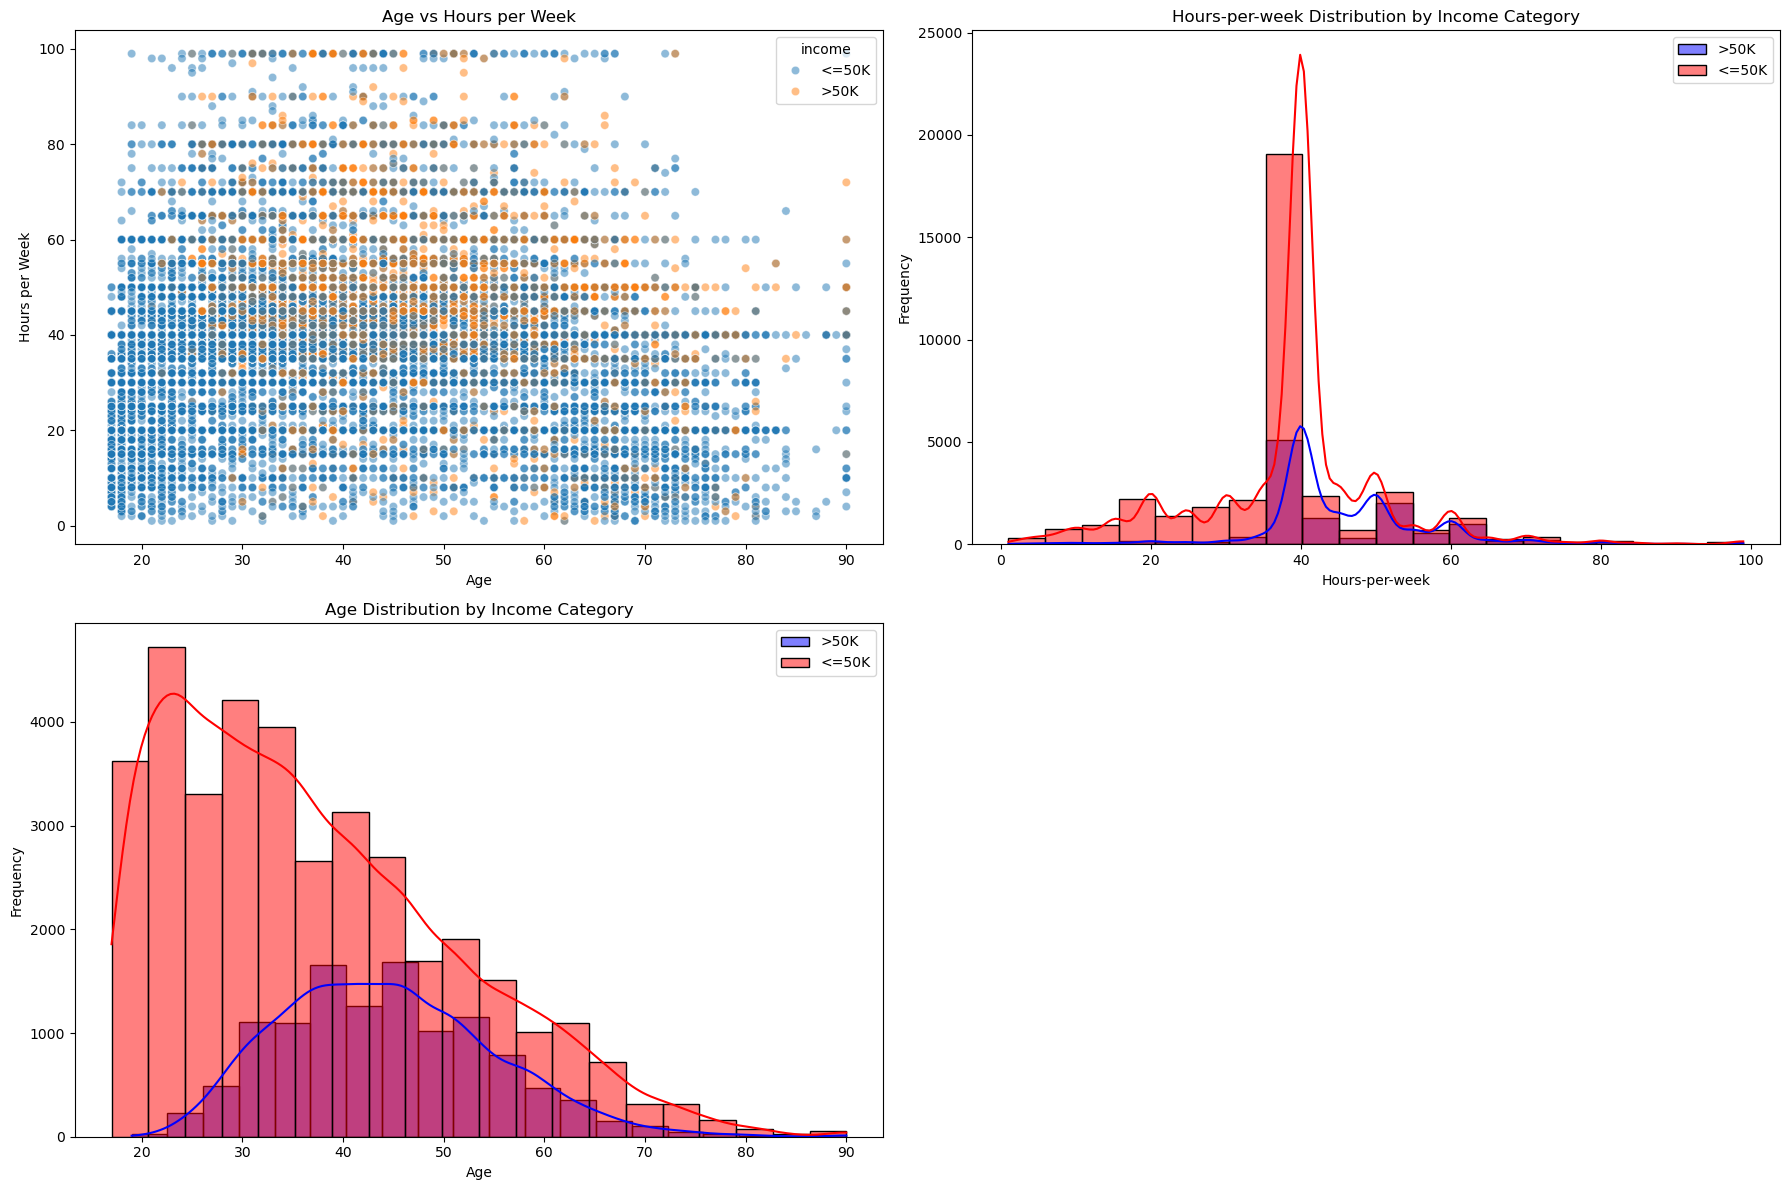

In [23]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Example: Pairwise scatter plot between age and hours-per-week
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df, alpha=0.5, ax=axs[0, 0])
axs[0, 0].set_title('Age vs Hours per Week')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Hours per Week')

# Plot for hours-per-week distribution
sns.histplot(df[df['income'] == '>50K']['hours-per-week'], bins=20, kde=True, color='blue', label='>50K', ax=axs[0, 1])
sns.histplot(df[df['income'] == '<=50K']['hours-per-week'], bins=20, kde=True, color='red', label='<=50K', ax=axs[0, 1])
axs[0, 1].set_title('Hours-per-week Distribution by Income Category')
axs[0, 1].set_xlabel('Hours-per-week')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend()

# Plot for age distribution
sns.histplot(df[df['income'] == '>50K']['age'], bins=20, kde=True, color='blue', label='>50K', ax=axs[1, 0])
sns.histplot(df[df['income'] == '<=50K']['age'], bins=20, kde=True, color='red', label='<=50K', ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution by Income Category')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Hide the empty subplot at (1,1)
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Observations:
- People aged below 17-30 aren't earning much even when working full-time. 😕
- There are very few people above 30 years old working less than 40 hours a week but earning more than 50K. 🤔
- Middle-aged individuals (30 to 50 years old) are earning a lot, mostly working 37 hours or more per week. 💼
- Most of the people are full-time worker working 37-40 hours a week.

#### Income by Material status

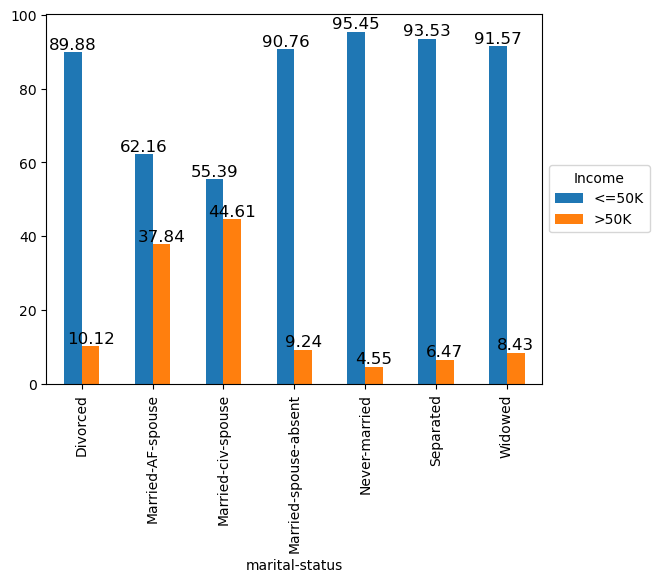

In [24]:
grouped_martial_Status_count = df.groupby(['marital-status','income']).size().unstack()
total_marital_status = grouped_martial_Status_count.sum(axis = 1)
grouped_martial_Status_proportion = round((grouped_martial_Status_count.div(total_marital_status, axis = 0)*100),2)

# Plot the data
grouped_martial_Status_proportion.plot(kind = 'bar')
ax = plt.gca()
annotate_bars(ax)
# Move the legend outside the plot
plt.legend(title='Income', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Observation:
- Married-civ-spouse and Married-AF-spouse are earning more than 50K compare to other meterial-status.

<Figure size 1000x600 with 0 Axes>

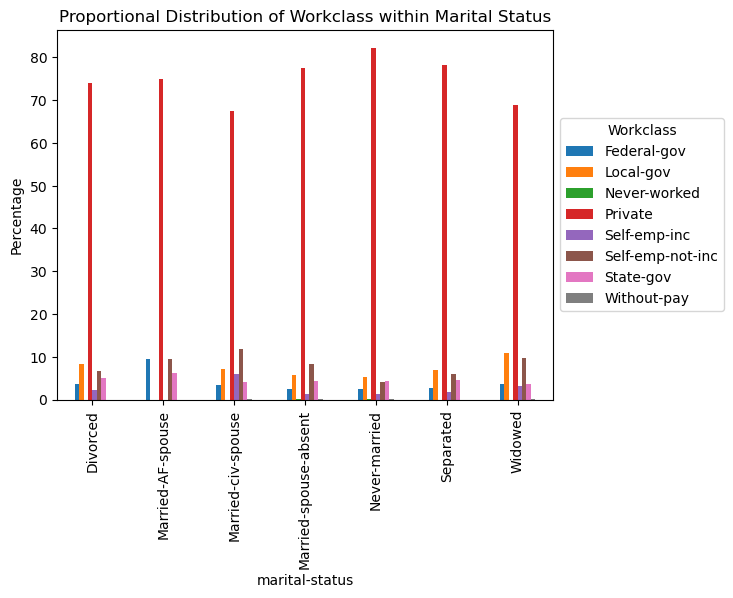

In [25]:
# Normalize the data by calculating the percentage of workclass within each marital-status group
grouped_marital_workclass = df.groupby(['marital-status', 'workclass']).size().unstack()

# Calculate the total count for each marital-status
total_marital_status = grouped_marital_workclass.sum(axis=1)

# Calculate the percentage of workclass within each marital-status group
grouped_marital_status_proportion = round((grouped_marital_workclass.div(total_marital_status, axis=0) * 100), 2)

# Plot the data
plt.figure(figsize=(10, 6))
grouped_marital_status_proportion.plot(kind='bar')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Title and labels
plt.title('Proportional Distribution of Workclass within Marital Status')
plt.ylabel('Percentage')

# Move the legend outside the plot
plt.legend(title='Workclass', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

observation:
- The `Private` workclass overwhelmingly prevails across all marital statuses, with each marital status group having more than 67% representation from the `Private` workclass.

#### Pairwise plot

In [26]:
sns.pairplot(data=df, hue='income', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2)
plt.show()

<hr>